In [ ]:
import pandas as pd

ruta_excel = "data_usil.xlsx"

df = pd.read_excel(ruta_excel)
print(df)

     CAMION           StartTime   Velocidad   Decibeles  Años     Tiempo  \
0     TD001 2023-10-23 11:52:17   77.418020   47.418020     2  13.023081   
1     TD001 2023-10-23 11:34:22   76.941657   46.941657     2  13.051137   
2     TD001 2023-10-23 12:11:15   96.311231   66.311231     2  10.412797   
3     TD001 2023-10-23 11:17:02   84.894689   54.894689     2  11.718197   
4     TD001 2023-10-23 11:00:26   85.718185   55.718185     2  11.464390   
...     ...                 ...         ...         ...   ...        ...   
1266  TD013 2023-10-22 23:56:33    7.389711   62.389711     9  29.733235   
1267  TD013 2023-10-22 23:50:50   46.037657  101.037657     9   7.011651   
1268  TD013 2023-10-22 23:42:58  436.160976  491.160976     9   2.952671   
1269  TD013 2023-10-22 14:27:22   17.963107   37.036893     9  73.266836   
1270  TD013 2023-10-22 11:32:32   20.201949   34.798051     9  65.144210   

        Tonelaje        Día  Distancia  
0      97.872744 2023-10-23  16.803686  
1    

In [ ]:

print(df.info())

print(df.describe())

print("Tamaño del dataset:", df.shape)

print("Columnas del dataset:", df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CAMION     1271 non-null   object        
 1   StartTime  1271 non-null   datetime64[ns]
 2   Velocidad  1271 non-null   float64       
 3   Decibeles  1271 non-null   float64       
 4   Años       1271 non-null   int64         
 5   Tiempo     1271 non-null   float64       
 6   Tonelaje   1271 non-null   float64       
 7   Día        1271 non-null   datetime64[ns]
 8   Distancia  1271 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 89.5+ KB
None
                           StartTime    Velocidad    Decibeles         Años  \
count                           1271  1271.000000  1271.000000  1271.000000   
mean   2023-10-25 20:03:37.664044032    46.044917    48.181591     5.070024   
min              2023-10-22 07:14:09     0.144611   -

CAMION       0
StartTime    0
Velocidad    0
Decibeles    0
Años         0
Tiempo       0
Tonelaje     0
Día          0
Distancia    0
dtype: int64


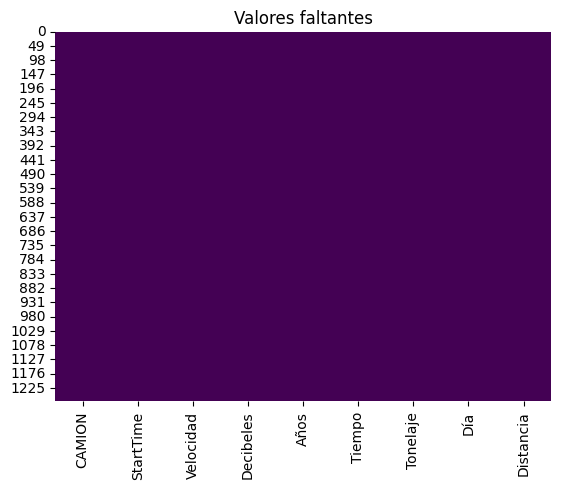

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes")
plt.show()


In [ ]:

duplicados = df.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")


Filas duplicadas: 0


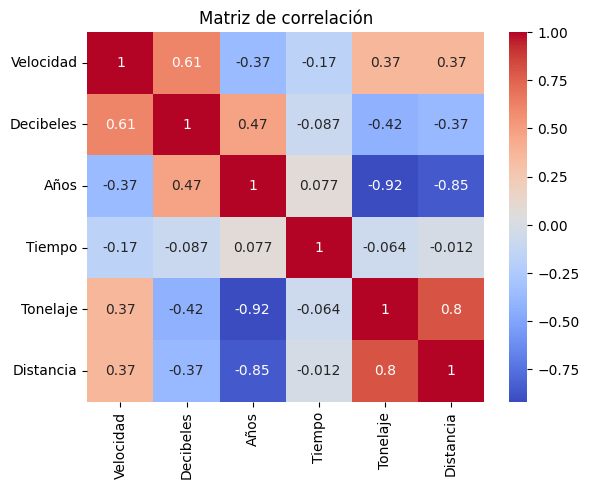

In [ ]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [ ]:
features = ["Velocidad", "Decibeles", "Tiempo", "Distancia"]
target = "Tonelaje"

X = df[features]
y = df[target]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 7.8766034319078315


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)

rmse_xgb = np.sqrt(mse_xgb)

print(f"RMSE (XGBoost): {rmse_xgb}")


RMSE (XGBoost): 8.060418431454599


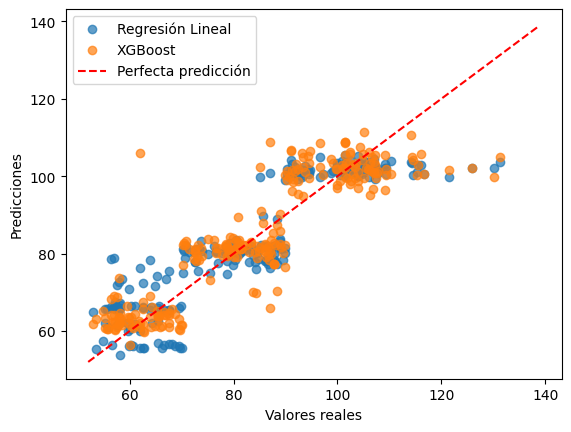

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, label="Regresión Lineal")
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label="XGBoost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", label="Perfecta predicción")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 7.678188813609036


In [ ]:
new_data = pd.DataFrame({
    "Velocidad": [80],
    "Decibeles": [50],
    "Tiempo": [15],
    "Distancia": [18]
})

new_data_scaled = scaler.transform(new_data)

predicted_tonelaje = model.predict(new_data_scaled)
print(f"Tonelaje estimado: {predicted_tonelaje[0]}")


Tonelaje estimado: 96.82475403719017
